In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv('crude-oil-price.csv')
df.head(10)

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62
5,1983-08-01T00:00:00,31.59,-1.281250,-0.41
6,1983-09-01T00:00:00,30.36,-3.893637,-1.23
7,1983-10-03T00:00:00,30.37,0.032938,0.01
8,1983-11-01T00:00:00,29.23,-3.753704,-1.14
9,1983-12-01T00:00:00,29.60,1.265823,0.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           469 non-null    object 
 1   price          469 non-null    float64
 2   percentChange  468 non-null    float64
 3   change         468 non-null    float64
dtypes: float64(3), object(1)
memory usage: 14.8+ KB


### Null handling

In [5]:
df.isnull().sum()

date             0
price            0
percentChange    1
change           1
dtype: int64

In [6]:
df['percentChange'].fillna(df['percentChange'].mean(), inplace=True)

In [7]:
df['change'].fillna(df['change'].mean(), inplace=True)

In [8]:
df

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,0.838667,0.171068
1,1983-04-04T00:00:00,30.63,4.646396,1.360000
2,1983-05-02T00:00:00,30.25,-1.240614,-0.380000
3,1983-06-01T00:00:00,31.38,3.735537,1.130000
4,1983-07-01T00:00:00,32.00,1.975781,0.620000
...,...,...,...,...
464,2021-11-01T00:00:00,65.85,-19.479090,-15.930000
465,2021-12-01T00:00:00,74.88,13.712984,9.030000
466,2022-01-03T00:00:00,86.49,15.504808,11.610000
467,2022-02-01T00:00:00,95.72,10.671754,9.230000


In [9]:
df.isnull().sum()

date             0
price            0
percentChange    0
change           0
dtype: int64

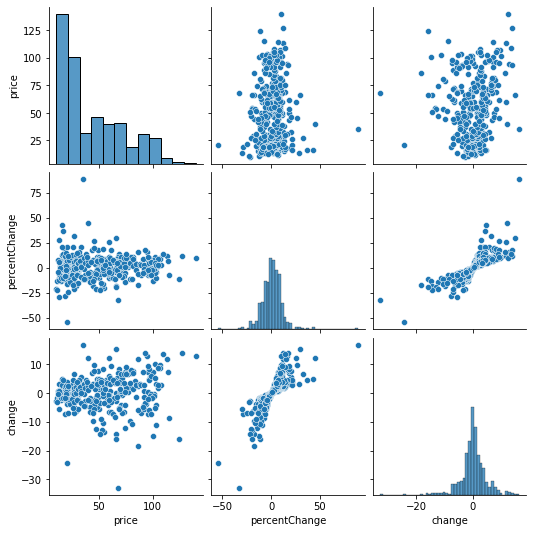

In [10]:
sns.pairplot(df)

### Date-time fix

In [11]:
df['date']=pd.to_datetime(df['date'])

In [12]:
df

,date,price,percentChange,change
0,1983-03-30,29.27,0.838667,0.171068
1,1983-04-04,30.63,4.646396,1.360000
2,1983-05-02,30.25,-1.240614,-0.380000
3,1983-06-01,31.38,3.735537,1.130000
4,1983-07-01,32.00,1.975781,0.620000
...,...,...,...,...
464,2021-11-01,65.85,-19.479090,-15.930000
465,2021-12-01,74.88,13.712984,9.030000
466,2022-01-03,86.49,15.504808,11.610000
467,2022-02-01,95.72,10.671754,9.230000


In [13]:
df['date']=df['date'].map(dt.datetime.toordinal)

In [14]:
df

,date,price,percentChange,change
0,723999,29.27,0.838667,0.171068
1,724004,30.63,4.646396,1.360000
2,724032,30.25,-1.240614,-0.380000
3,724062,31.38,3.735537,1.130000
4,724092,32.00,1.975781,0.620000
...,...,...,...,...
464,738095,65.85,-19.479090,-15.930000
465,738125,74.88,13.712984,9.030000
466,738158,86.49,15.504808,11.610000
467,738187,95.72,10.671754,9.230000


### Data separation for training

In [15]:
y=df.iloc[:, 1:2]
y.head()

,price
0,29.27
1,30.63
2,30.25
3,31.38
4,32.00


In [16]:
x=df.drop('price', axis=1)
x.head()

,date,percentChange,change
0,723999,0.838667,0.171068
1,724004,4.646396,1.360000
2,724032,-1.240614,-0.380000
3,724062,3.735537,1.130000
4,724092,1.975781,0.620000


In [17]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y, test_size=0.2)

In [18]:
LR=LinearRegression()

In [19]:
LR.fit(X_train, Y_train)

LinearRegression()

In [20]:
y_pred=LR.predict(X_test)

In [21]:
score=r2_score(Y_test, y_pred)
score

0.5071931274005401

### Deleting date

In [46]:
x=df.drop(['date'],axis=1)
x

,price,percentChange,change
0,29.27,0.838667,0.171068
1,30.63,4.646396,1.360000
2,30.25,-1.240614,-0.380000
3,31.38,3.735537,1.130000
4,32.00,1.975781,0.620000
...,...,...,...
464,65.85,-19.479090,-15.930000
465,74.88,13.712984,9.030000
466,86.49,15.504808,11.610000
467,95.72,10.671754,9.230000


In [55]:
y

,price
0,29.27
1,30.63
2,30.25
3,31.38
4,32.00
...,...
464,65.85
465,74.88
466,86.49
467,95.72


In [56]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y, test_size=0.25)

In [57]:
LR=LinearRegression()

In [58]:
LR.fit(X_train, Y_train)

LinearRegression()

In [53]:
y_pred=LR.predict(X_test)

In [59]:
score=r2_score(Y_test, y_pred)
score

-1.4464875302155566